In [1]:
import numpy as np
from matplotlib import pyplot as plt

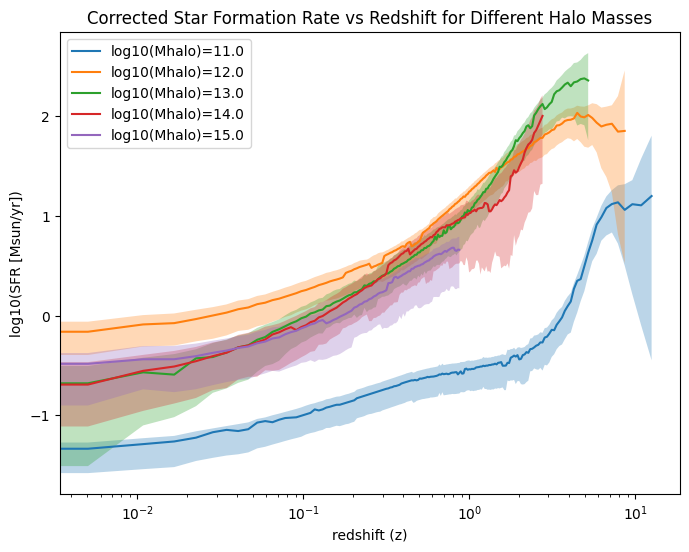

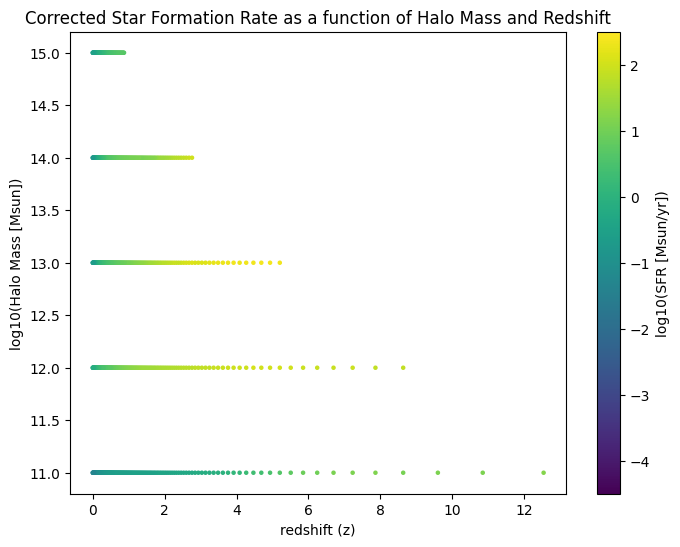

In [33]:
masses = [11.0, 12.0, 13.0, 14.0, 15.0]
sfr_corrs = {mass: np.loadtxt(f"../simim/data/release-sfh_z0_z8_052913/sfr/sfr_corrected_{mass:.1f}.dat") for mass in masses}
scalefactors = {mass: sfr_corrs[mass][:,0] for mass in masses}
sfr_values = {mass: sfr_corrs[mass][:,1] for mass in masses}
errup = {mass: sfr_corrs[mass][:,2] for mass in masses}
errdown = {mass: sfr_corrs[mass][:,3] for mass in masses}

log10sfr_values = {mass: np.log10(sfr_values[mass]) for mass in masses}
log10sfr_errup = {mass: np.log10(sfr_values[mass] + errup[mass]) for mass in masses}
log10sfr_errdown = {mass: np.log10(sfr_values[mass] - errdown[mass]) for mass in masses}

redshifts = {mass: 1/scalefactors[mass] - 1 for mass in masses}

plt.figure(figsize=(8,6))
for mass in masses:
    plt.plot(redshifts[mass], log10sfr_values[mass], label=f'log10(Mhalo)={mass}')
    plt.fill_between(redshifts[mass], log10sfr_errdown[mass], log10sfr_errup[mass], alpha=0.3)
plt.xlabel('redshift (z)')
plt.ylabel('log10(SFR [Msun/yr])')
plt.title('Corrected Star Formation Rate vs Redshift for Different Halo Masses')
plt.legend()
plt.xscale('log')
plt.show()

plt.figure(figsize=(8,6))
for mass in masses:
    plt.scatter(redshifts[mass], np.ones_like(redshifts[mass]) * mass, c=log10sfr_values[mass], cmap='viridis', s=5, vmin=-4.5, vmax=2.5)
plt.colorbar(label='log10(SFR [Msun/yr])')
plt.xlabel('redshift (z)')
plt.ylabel('log10(Halo Mass [Msun])')
plt.title('Corrected Star Formation Rate as a function of Halo Mass and Redshift')
plt.show()


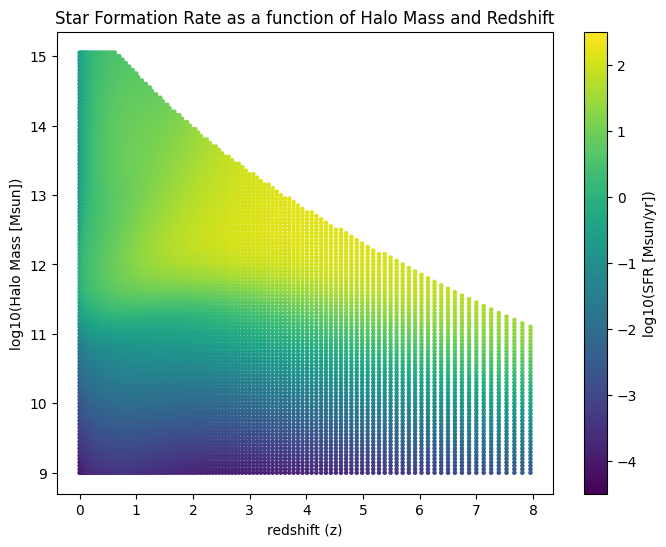

In [31]:
sfr_release = np.loadtxt("../simim/data/release-sfh_z0_z8_052913/sfr/sfr_release.dat")
z, log10halomass, log10sfr = sfr_release[:,0] - 1, sfr_release[:,1], sfr_release[:,2]

log10sfr[log10sfr == -1000.0] = np.nan  # replace sentinel value with NaN for better plotting

plt.figure(figsize=(8,6))
# scatter with z on y-axis, halomass on x-axis, and color as sfr
plt.scatter(z, log10halomass, c=log10sfr, cmap='viridis', s=5, vmin=-4.5, vmax=2.5)
plt.colorbar(label='log10(SFR [Msun/yr])')
plt.xlabel('redshift (z)')
plt.ylabel('log10(Halo Mass [Msun])')
plt.title('Star Formation Rate as a function of Halo Mass and Redshift')
plt.show()

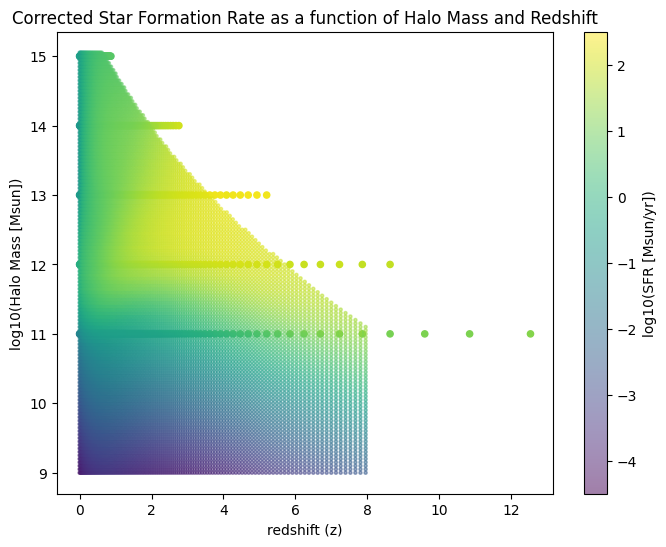

In [32]:
plt.figure(figsize=(8,6))
for mass in masses:
    plt.scatter(redshifts[mass], np.ones_like(redshifts[mass]) * mass, c=log10sfr_values[mass], cmap='viridis', s=20, vmin=-4.5, vmax=2.5)
plt.scatter(z, log10halomass, c=log10sfr, cmap='viridis', s=5, vmin=-4.5, vmax=2.5, alpha=0.5)
plt.colorbar(label='log10(SFR [Msun/yr])')
plt.xlabel('redshift (z)')
plt.ylabel('log10(Halo Mass [Msun])')
plt.title('Corrected Star Formation Rate as a function of Halo Mass and Redshift')
plt.show()